In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')                         # IMPORTING LIBRARIES

In [73]:
train=pd.read_csv('/content/Titanic_train.csv')
test=pd.read_csv('/content/Titanic_test.csv') #LOADING DATASET

In [74]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [76]:
train.shape

(891, 12)

In [77]:
test.shape

(418, 11)

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [79]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [80]:
## EDA

train.isnull().sum()    #null values are present

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [81]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


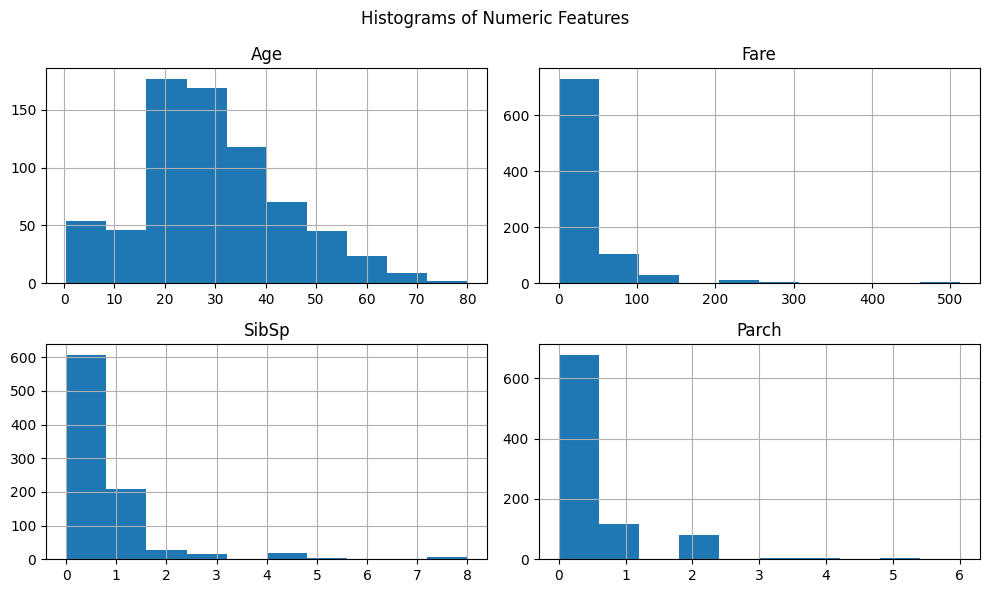

In [82]:

# Histograms for numeric columns
train[['Age', 'Fare', 'SibSp', 'Parch']].hist(figsize=(10, 6))
plt.suptitle("Histograms of Numeric Features")
plt.tight_layout()
plt.show()

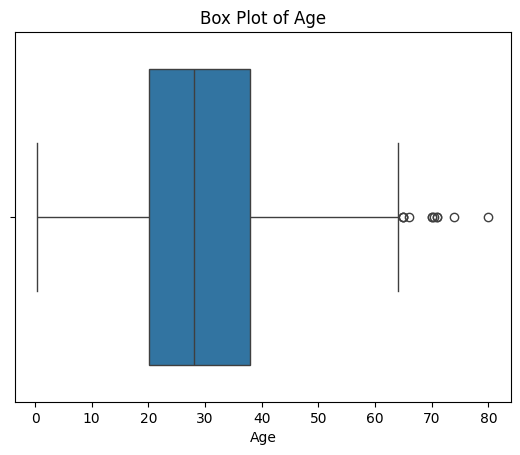

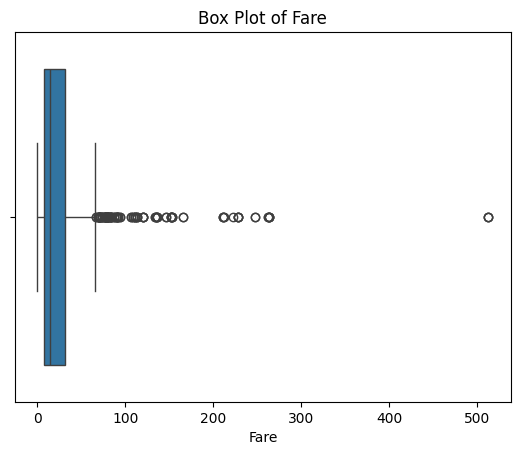

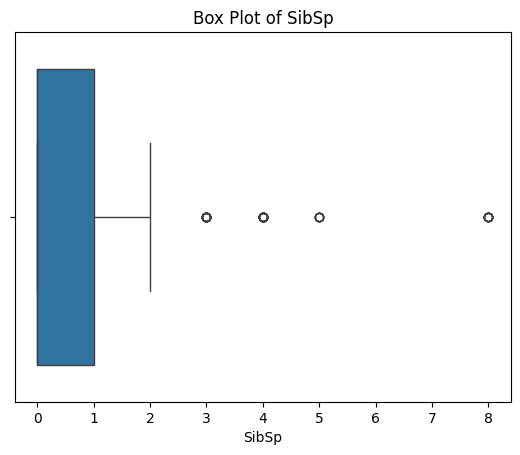

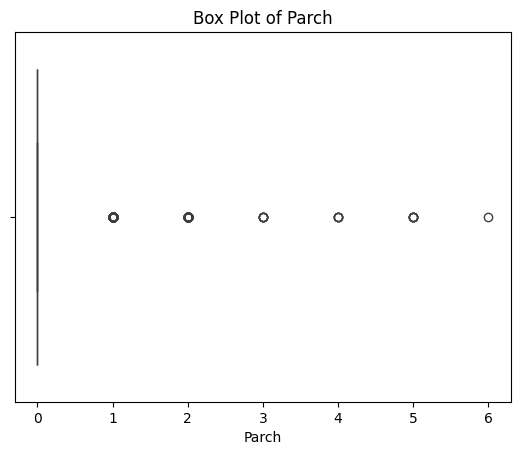

In [83]:
# Box plots
for col in ['Age', 'Fare', 'SibSp', 'Parch']:
    sns.boxplot(x=train[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

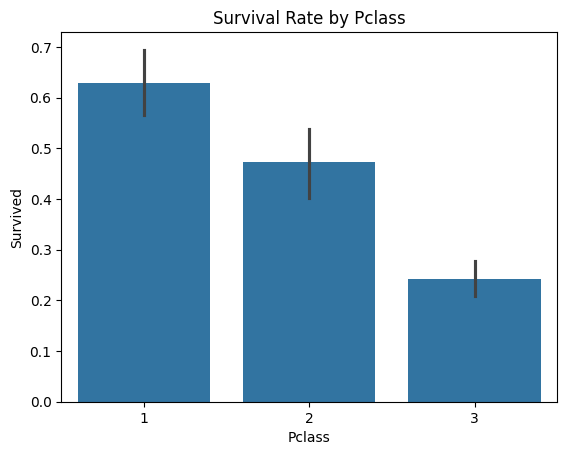

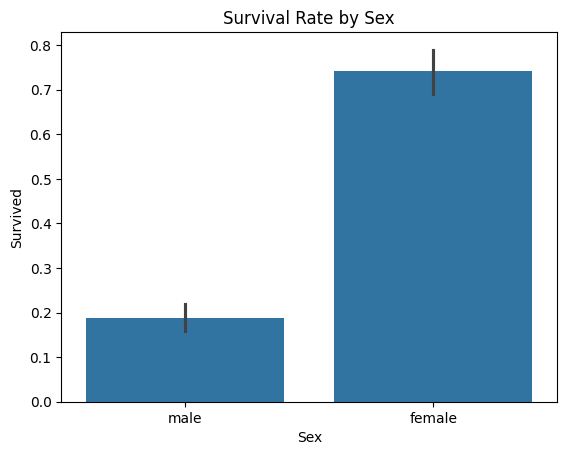

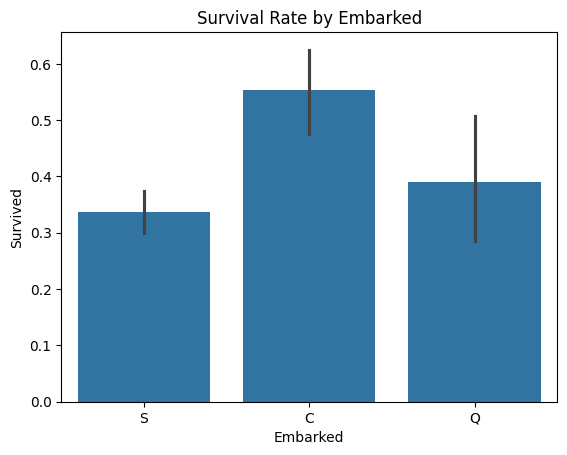

In [84]:

# Bar plots
for col in ['Pclass', 'Sex', 'Embarked']:
    sns.barplot(x=col, y='Survived', data=train)
    plt.title(f'Survival Rate by {col}')
    plt.show()

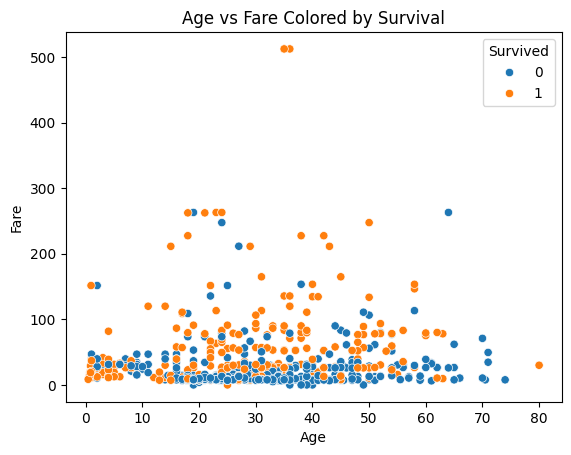

In [85]:
# Scatter plot
sns.scatterplot(data=train, x='Age', y='Fare', hue='Survived')
plt.title("Age vs Fare Colored by Survival")
plt.show()

In [86]:
# Data Preprocessing
# ========================
# Fill missing values
train['Age'].fillna(train['Age'].median(), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)
test['Fare'].fillna(test['Fare'].median(), inplace=True)

In [87]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['Sex', 'Embarked']:
    train[col] = le.fit_transform(train[col])
    test[col] = le.transform(test[col])

In [88]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [89]:
# Model Building & Evaluation
# ========================
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[features]
y = train['Survived']

In [90]:
# Train/test split

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
# Model Training with Tuning

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

print("\nTuning LightGBM...")
lgbm = LGBMClassifier(random_state=42)
lgbm_params = {'num_leaves': [31, 50], 'learning_rate': [0.05, 0.1], 'n_estimators': [100, 150]}
lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=5, scoring='accuracy')
lgbm_grid.fit(X_train, y_train)
best_lgbm = lgbm_grid.best_estimator_
print("Best LightGBM params:", lgbm_grid.best_params_)


print("\nTuning XGBoost...")
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_params = {'max_depth': [3, 5], 'learning_rate': [0.05, 0.1], 'n_estimators': [100, 150]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)
best_xgb = xgb_grid.best_estimator_
print("Best XGBoost params:", xgb_grid.best_params_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [92]:
# Model Evaluation

def evaluate(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

y_pred_lgbm = best_lgbm.predict(X_val)
y_pred_xgb = best_xgb.predict(X_val)

results = pd.DataFrame({
    'LightGBM': evaluate(y_val, y_pred_lgbm),
    'XGBoost': evaluate(y_val, y_pred_xgb)
}).T

In [93]:
print("\nModel Comparison Results (After Tuning):")
print(results)


Model Comparison Results (After Tuning):
          Accuracy  Precision    Recall  F1 Score
LightGBM  0.843575   0.810811  0.810811  0.810811
XGBoost   0.815642   0.825397  0.702703  0.759124


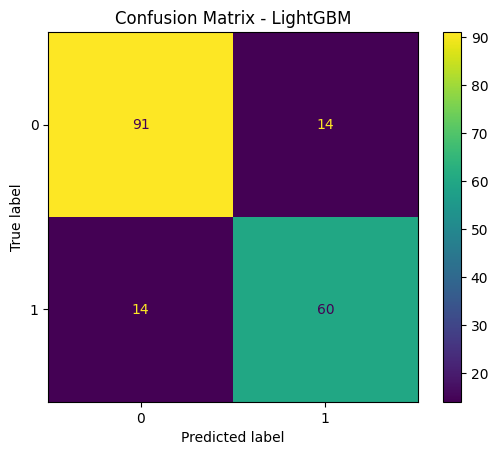

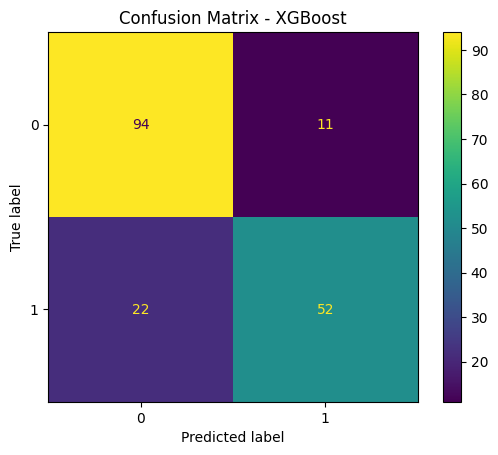

In [94]:
# Confusion Matrices

cm_lgbm = confusion_matrix(y_val, y_pred_lgbm)
cm_xgb = confusion_matrix(y_val, y_pred_xgb)

ConfusionMatrixDisplay(cm_lgbm).plot()
plt.title("Confusion Matrix - LightGBM")
plt.show()

ConfusionMatrixDisplay(cm_xgb).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

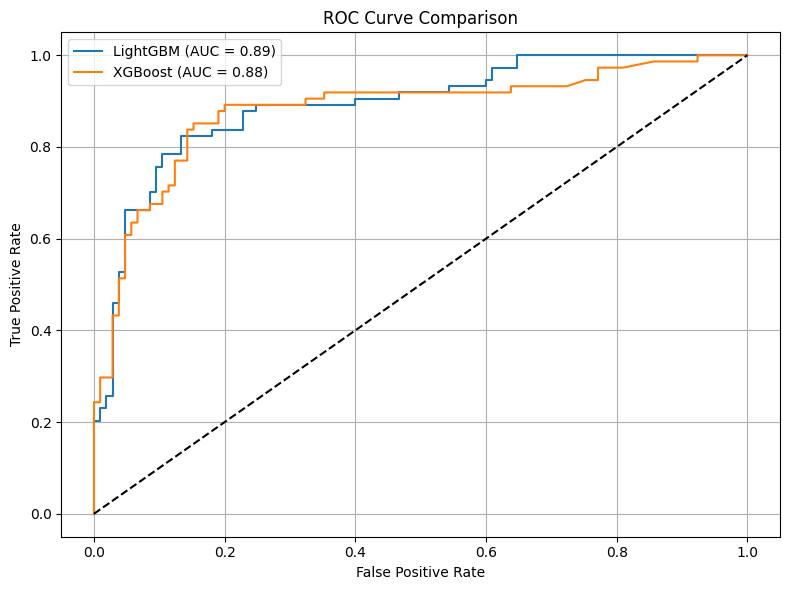

In [95]:
# ROC Curve

def plot_roc_curve(model, X_val, y_val, label):
    y_score = model.predict_proba(X_val)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

plt.figure(figsize=(8, 6))
plot_roc_curve(best_lgbm, X_val, y_val, 'LightGBM')
plot_roc_curve(best_xgb, X_val, y_val, 'XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


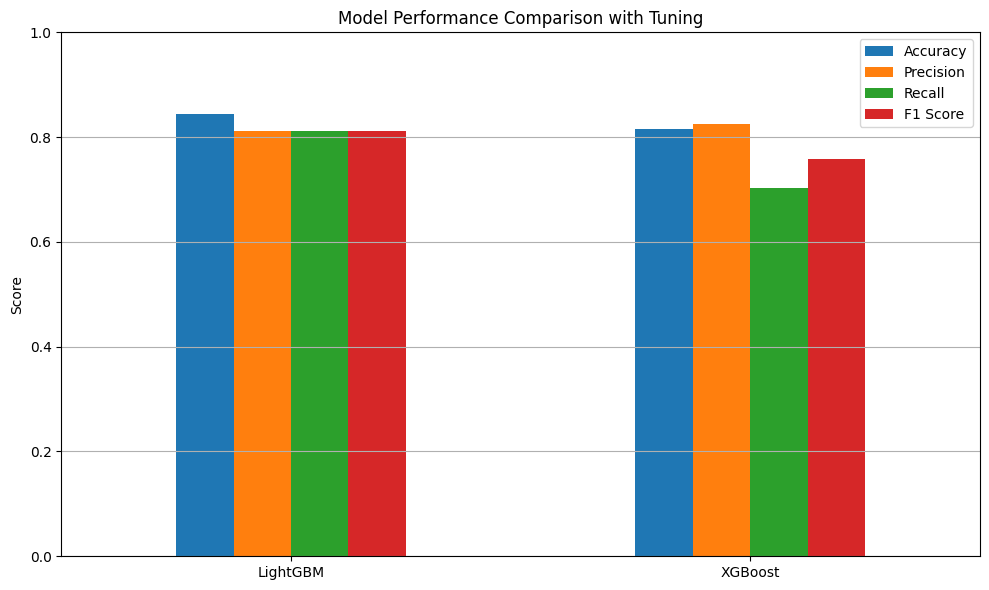

In [96]:
# Performance Comparison Bar Chart

results.plot(kind='bar', figsize=(10, 6), title='Model Performance Comparison with Tuning')
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

2. Interpretation: Strengths & Weaknesses
* Strengths of LightGBM:

Faster training on large datasets due to histogram-based learning.

Typically performs well with high-dimensional data and sparse datasets.

Lower memory usage.

* Strengths of XGBoost:

Often slightly better accuracy due to regularization (L1 & L2).

More robust against overfitting.

Generally better precision and F1 in imbalanced datasets.

In [97]:
## Done